# DATA PREPROCESSING
## MovieViewing

In [71]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.api as sm
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [72]:
font = {'family' : 'NanumGothic', 'size'   : 10}
mpl.rc('font', **font)

In [73]:
k_movie = pd.read_csv("k_movie.csv")

In [74]:
k_movie = k_movie.dropna()

In [75]:
k_movie.head(10)

,MOVIE_NM,DRCTR_NM,MAKR_NM,DISTB_CMPNY_NM,OPN_DE,MOVIE_TY_NM,MOVIE_STLE_NM,NLTY_NM,TOT_SCRN_CO,VIEWNG_NMPR_CO,SEOUL_VIEWNG_NMPR_CO,GENRE_NM,GRAD_NM,MOVIE_SDIV_NM,CRITIC_RT,VIEWER_RT
0,산상수훈,유영의,(주)그란,"이언픽쳐스,(주)그란",20171207,개봉영화,장편,한국,71.00,284.00,284.00,드라마,전체관람가,독립/예술영화,3.00,6.30
1,교회오빠,이호경,"KBS,커넥트픽쳐스(주)",커넥트픽쳐스(주),20190516,개봉영화,장편,한국,200.00,154.00,154.00,다큐멘터리,전체관람가,독립/예술영화,5.59,9.31
2,기생충,봉준호,(주)바른손이앤에이,(주)씨제이이엔엠,20190530,개봉영화,장편,한국,1948.00,227811.00,97354.00,드라마,15세이상관람가,일반영화,9.06,8.49
3,이타미 준의 바다,정다운,기린그림,(주)영화사 진진,20190815,개봉영화,장편,한국,57.00,144.00,144.00,다큐멘터리,전체관람가,독립/예술영화,6.50,8.96
4,벌새,김보라,에피파니(주),"(주)엣나인필름,(주)콘텐츠판다",20190829,개봉영화,장편,한국,145.00,2721.00,2082.00,드라마,15세이상관람가,독립/예술영화,5.59,7.44
5,메기,이옥섭,"국가인권위원회,2X9HD","(주)엣나인필름,CGV아트하우스",20190926,개봉영화,장편,한국,155.00,745.00,632.00,미스터리,15세이상관람가,독립/예술영화,6.83,8.15
6,북간도의 십자가,반태경,(재)CBS,"(재)CBS,주식회사 마운틴픽쳐스",20191017,개봉영화,장편,한국,123.00,52.00,52.00,다큐멘터리,전체관람가,독립/예술영화,5.59,7.90
7,82년생 김지영,김도영,(주)봄바람영화사,롯데컬처웍스(주)롯데엔터테인먼트,20191023,개봉영화,장편,한국,1486.00,863.00,189.00,드라마,12세이상관람가,일반영화,6.79,6.67
8,블랙머니,정지영,"유한회사 질라라비,(주)아우라픽처스",(주)에이스메이커무비웍스,20191113,개봉영화,장편,한국,1117.00,700.00,490.00,범죄,12세이상관람가,일반영화,5.59,7.44
9,대통령의 7시간,이상호,(주)씨네포트,"(주)씨네포트,주식회사 마운틴픽쳐스",20191114,개봉영화,장편,한국,84.00,256.00,108.00,다큐멘터리,12세이상관람가,독립/예술영화,5.59,6.00


In [76]:
k_movie.info() #category, numeric 분리

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MOVIE_NM              358 non-null    object 
 1   DRCTR_NM              358 non-null    object 
 2   MAKR_NM               358 non-null    object 
 3   DISTB_CMPNY_NM        358 non-null    object 
 4   OPN_DE                358 non-null    object 
 5   MOVIE_TY_NM           358 non-null    object 
 6   MOVIE_STLE_NM         358 non-null    object 
 7   NLTY_NM               358 non-null    object 
 8   TOT_SCRN_CO           358 non-null    float64
 9   VIEWNG_NMPR_CO        358 non-null    float64
 10  SEOUL_VIEWNG_NMPR_CO  358 non-null    float64
 11  GENRE_NM              358 non-null    object 
 12  GRAD_NM               358 non-null    object 
 13  MOVIE_SDIV_NM         358 non-null    object 
 14  CRITIC_RT             358 non-null    float64
 15  VIEWER_RT             3

In [77]:
k_movie.isna().sum()

MOVIE_NM                0
DRCTR_NM                0
MAKR_NM                 0
DISTB_CMPNY_NM          0
OPN_DE                  0
MOVIE_TY_NM             0
MOVIE_STLE_NM           0
NLTY_NM                 0
TOT_SCRN_CO             0
VIEWNG_NMPR_CO          0
SEOUL_VIEWNG_NMPR_CO    0
GENRE_NM                0
GRAD_NM                 0
MOVIE_SDIV_NM           0
CRITIC_RT               0
VIEWER_RT               0
dtype: int64

In [78]:
k_movie['OPN_DE'] = k_movie['OPN_DE'].astype('string')
dates = list(k_movie['OPN_DE'])

for date in dates:
    year = re.findall(r'\d{4}', date)
    k_movie.loc[k_movie['OPN_DE']==date, 'YEAR'] = year[0]
    month = re.findall(r'\d{2}', date)
    k_movie.loc[k_movie['OPN_DE']==date, 'MONTH'] = month[2]

In [79]:
k_movie.head()

,MOVIE_NM,DRCTR_NM,MAKR_NM,DISTB_CMPNY_NM,OPN_DE,MOVIE_TY_NM,MOVIE_STLE_NM,NLTY_NM,TOT_SCRN_CO,VIEWNG_NMPR_CO,SEOUL_VIEWNG_NMPR_CO,GENRE_NM,GRAD_NM,MOVIE_SDIV_NM,CRITIC_RT,VIEWER_RT,YEAR,MONTH
0,산상수훈,유영의,(주)그란,"이언픽쳐스,(주)그란",20171207,개봉영화,장편,한국,71.00,284.00,284.00,드라마,전체관람가,독립/예술영화,3.00,6.30,2017,12
1,교회오빠,이호경,"KBS,커넥트픽쳐스(주)",커넥트픽쳐스(주),20190516,개봉영화,장편,한국,200.00,154.00,154.00,다큐멘터리,전체관람가,독립/예술영화,5.59,9.31,2019,05
2,기생충,봉준호,(주)바른손이앤에이,(주)씨제이이엔엠,20190530,개봉영화,장편,한국,1948.00,227811.00,97354.00,드라마,15세이상관람가,일반영화,9.06,8.49,2019,05
3,이타미 준의 바다,정다운,기린그림,(주)영화사 진진,20190815,개봉영화,장편,한국,57.00,144.00,144.00,다큐멘터리,전체관람가,독립/예술영화,6.50,8.96,2019,08
4,벌새,김보라,에피파니(주),"(주)엣나인필름,(주)콘텐츠판다",20190829,개봉영화,장편,한국,145.00,2721.00,2082.00,드라마,15세이상관람가,독립/예술영화,5.59,7.44,2019,08


In [80]:
pd.options.display.float_format = '{:.2f}'.format

k_movie['VIEWNG_NMPR_CO'].describe()

count       358.00
mean     115831.10
std      493632.33
min           1.00
25%         284.75
50%         943.50
75%        7872.00
max     4750104.00
Name: VIEWNG_NMPR_CO, dtype: float64

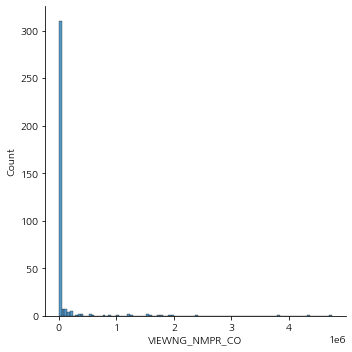

In [81]:
sns.displot(k_movie['VIEWNG_NMPR_CO'], bins = 100)

<AxesSubplot:xlabel='VIEWNG_NMPR_CO'>

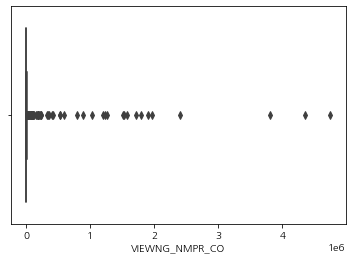

In [82]:
sns.boxplot(data = k_movie, x = 'VIEWNG_NMPR_CO')

In [83]:
s, p = stats.shapiro(k_movie['VIEWNG_NMPR_CO'])
print('statistic : %.2f, p-value : %.3f'%(s,p))

statistic : 0.25, p-value : 0.000


In [84]:
view_skew = stats.skew(k_movie['VIEWNG_NMPR_CO'])
view_kurt = stats.kurtosis(k_movie['VIEWNG_NMPR_CO'])
print('skewness : %.3f, kurtosis : %.3f'%(view_skew, view_kurt)) #왜도, 첨도 모두 2보다 큼

skewness : 6.373, kurtosis : 46.792


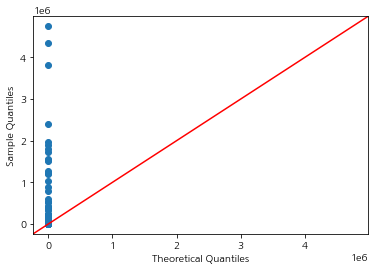

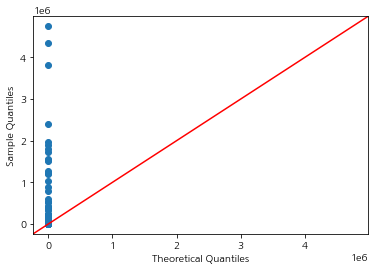

In [85]:
sm.qqplot(k_movie['VIEWNG_NMPR_CO'], line='45')

In [86]:
k_movie=k_movie.dropna(subset=['VIEWNG_NMPR_CO', 'DISTB_CMPNY_NM'])
k_movie['DISTB_CMPNY_NM']=k_movie['DISTB_CMPNY_NM'].apply(lambda x: str(x).split(','))
count=[]
for i in range(len(k_movie)):
    count.append(len(k_movie['DISTB_CMPNY_NM'][i]))
k_movie['DISTB_CMPNY_COUNT']=count

In [87]:
#outliers에 robust한 median을 기준으로 흥행 np 분류
k_med = k_movie['VIEWNG_NMPR_CO'].median()

k_movie.loc[k_movie['VIEWNG_NMPR_CO']<k_med, 'SUCCESS'] = 0
k_movie.loc[k_movie['VIEWNG_NMPR_CO']>k_med, 'SUCCESS'] = 1 

In [88]:
k_movie.head()

,MOVIE_NM,DRCTR_NM,MAKR_NM,DISTB_CMPNY_NM,OPN_DE,MOVIE_TY_NM,MOVIE_STLE_NM,NLTY_NM,TOT_SCRN_CO,VIEWNG_NMPR_CO,SEOUL_VIEWNG_NMPR_CO,GENRE_NM,GRAD_NM,MOVIE_SDIV_NM,CRITIC_RT,VIEWER_RT,YEAR,MONTH,DISTB_CMPNY_COUNT,SUCCESS
0,산상수훈,유영의,(주)그란,"[이언픽쳐스, (주)그란]",20171207,개봉영화,장편,한국,71.00,284.00,284.00,드라마,전체관람가,독립/예술영화,3.00,6.30,2017,12,2,0.00
1,교회오빠,이호경,"KBS,커넥트픽쳐스(주)",[커넥트픽쳐스(주)],20190516,개봉영화,장편,한국,200.00,154.00,154.00,다큐멘터리,전체관람가,독립/예술영화,5.59,9.31,2019,05,1,0.00
2,기생충,봉준호,(주)바른손이앤에이,[(주)씨제이이엔엠],20190530,개봉영화,장편,한국,1948.00,227811.00,97354.00,드라마,15세이상관람가,일반영화,9.06,8.49,2019,05,1,1.00
3,이타미 준의 바다,정다운,기린그림,[(주)영화사 진진],20190815,개봉영화,장편,한국,57.00,144.00,144.00,다큐멘터리,전체관람가,독립/예술영화,6.50,8.96,2019,08,1,0.00
4,벌새,김보라,에피파니(주),"[(주)엣나인필름, (주)콘텐츠판다]",20190829,개봉영화,장편,한국,145.00,2721.00,2082.00,드라마,15세이상관람가,독립/예술영화,5.59,7.44,2019,08,2,1.00


In [89]:
k_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MOVIE_NM              358 non-null    object 
 1   DRCTR_NM              358 non-null    object 
 2   MAKR_NM               358 non-null    object 
 3   DISTB_CMPNY_NM        358 non-null    object 
 4   OPN_DE                358 non-null    string 
 5   MOVIE_TY_NM           358 non-null    object 
 6   MOVIE_STLE_NM         358 non-null    object 
 7   NLTY_NM               358 non-null    object 
 8   TOT_SCRN_CO           358 non-null    float64
 9   VIEWNG_NMPR_CO        358 non-null    float64
 10  SEOUL_VIEWNG_NMPR_CO  358 non-null    float64
 11  GENRE_NM              358 non-null    object 
 12  GRAD_NM               358 non-null    object 
 13  MOVIE_SDIV_NM         358 non-null    object 
 14  CRITIC_RT             358 non-null    float64
 15  VIEWER_RT             3

In [92]:
k_movie = k_movie.astype({'MOVIE_TY_NM':'category', 'MOVIE_STLE_NM':'category', 'GENRE_NM':'category', 'GRAD_NM':'category', 'MOVIE_SDIV_NM':'category',
                         'SUCCESS':'category', 'YEAR':'category', 'MONTH':'category'})
k_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   MOVIE_NM              358 non-null    object  
 1   DRCTR_NM              358 non-null    object  
 2   MAKR_NM               358 non-null    object  
 3   DISTB_CMPNY_NM        358 non-null    object  
 4   OPN_DE                358 non-null    string  
 5   MOVIE_TY_NM           358 non-null    category
 6   MOVIE_STLE_NM         358 non-null    category
 7   NLTY_NM               358 non-null    object  
 8   TOT_SCRN_CO           358 non-null    float64 
 9   VIEWNG_NMPR_CO        358 non-null    float64 
 10  SEOUL_VIEWNG_NMPR_CO  358 non-null    float64 
 11  GENRE_NM              358 non-null    category
 12  GRAD_NM               358 non-null    category
 13  MOVIE_SDIV_NM         358 non-null    category
 14  CRITIC_RT             358 non-null    float64 
 15  VIEWER

In [91]:
k_movie.to_csv("k_movie_2.csv", index = False)

In [93]:
k_movie.head()

,MOVIE_NM,DRCTR_NM,MAKR_NM,DISTB_CMPNY_NM,OPN_DE,MOVIE_TY_NM,MOVIE_STLE_NM,NLTY_NM,TOT_SCRN_CO,VIEWNG_NMPR_CO,SEOUL_VIEWNG_NMPR_CO,GENRE_NM,GRAD_NM,MOVIE_SDIV_NM,CRITIC_RT,VIEWER_RT,YEAR,MONTH,DISTB_CMPNY_COUNT,SUCCESS
0,산상수훈,유영의,(주)그란,"[이언픽쳐스, (주)그란]",20171207,개봉영화,장편,한국,71.00,284.00,284.00,드라마,전체관람가,독립/예술영화,3.00,6.30,2017,12,2,0.00
1,교회오빠,이호경,"KBS,커넥트픽쳐스(주)",[커넥트픽쳐스(주)],20190516,개봉영화,장편,한국,200.00,154.00,154.00,다큐멘터리,전체관람가,독립/예술영화,5.59,9.31,2019,05,1,0.00
2,기생충,봉준호,(주)바른손이앤에이,[(주)씨제이이엔엠],20190530,개봉영화,장편,한국,1948.00,227811.00,97354.00,드라마,15세이상관람가,일반영화,9.06,8.49,2019,05,1,1.00
3,이타미 준의 바다,정다운,기린그림,[(주)영화사 진진],20190815,개봉영화,장편,한국,57.00,144.00,144.00,다큐멘터리,전체관람가,독립/예술영화,6.50,8.96,2019,08,1,0.00
4,벌새,김보라,에피파니(주),"[(주)엣나인필름, (주)콘텐츠판다]",20190829,개봉영화,장편,한국,145.00,2721.00,2082.00,드라마,15세이상관람가,독립/예술영화,5.59,7.44,2019,08,2,1.00
